 GitHUB Link
 https://github.com/adit0817/ProgrammingForDataScience_Assignment2

In [175]:
import pandas as pd
import numpy as np

1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [176]:
df = pd.read_csv("batting.csv")

2)	Print out the dimensions and info about the dataframe you just created

In [177]:
print("The dimensions of the dataframe is {} \n".format(df.shape))

print("Following is the info about the dataframe: \n". format(df.info()))


The dimensions of the dataframe is (102816, 25) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 

3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [178]:
HomeRun = pd.DataFrame(df.groupby(["yearID","playerID"]).agg({"HR":sum}))
NumberofPlayers = len(HomeRun[HomeRun["HR"]>=40])
NumberofPlayers

330

4)	How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)

In [179]:
HomeRun = pd.DataFrame(df.groupby(["playerID","nameFirst","nameLast"]).agg({"HR":sum}))
morethan600 = HomeRun[HomeRun["HR"] >= 600 ] 
dataFrame = morethan600.reset_index()[["nameFirst", "nameLast", "HR"]]
dataFrame

,nameFirst,nameLast,HR
0,Hank,Aaron,755
1,Barry,Bonds,762
2,Ken,Griffey,630
3,Willie,Mays,660
4,Alex,Rodriguez,696
5,Babe,Ruth,714
6,Sammy,Sosa,609
7,Jim,Thome,612


5)	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)


In [180]:
HitsOneYear = df.groupby(["yearID", "playerID"]).sum()
MorethanXHits = HitsOneYear[(HitsOneYear["2B"] >= 40) & (HitsOneYear["3B"] >=10) & (HitsOneYear["H"] >= 200) & (HitsOneYear["HR"] >=30 )].reset_index()
NumberOfPlayers = len(MorethanXHits["playerID"].unique())
NumberOfPlayers

11

6)	How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )


In [181]:
StolenBase = pd.DataFrame(df.groupby(["playerID","nameFirst", "nameLast", "yearID"]).agg({"SB":sum}))
MoreThan100StolenBase = StolenBase[StolenBase["SB"] >= 100].sort_values("SB", ascending = True)
MoreThan100StolenBase

,,,,SB
playerID,nameFirst,nameLast,yearID,
henderi01,Rickey,Henderson,1980,100.0
hamilbi01,Billy,Hamilton,1890,102.0
fogarji01,Jim,Fogarty,1887,102.0
brownpe01,Pete,Browning,1887,103.0
nicolhu01,Hugh,Nicol,1888,103.0
willsma01,Maury,Wills,1962,104.0
brownto01,Tom,Brown,1891,106.0
colemvi01,Vince,Coleman,1986,107.0
henderi01,Rickey,Henderson,1983,108.0


7)	How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)


In [182]:
Year1960To1970 = df[(df["yearID"] >= 1960) & (df["yearID"] < 1970)]
DataFrame = pd.DataFrame(Year1960To1970.groupby(["playerID", "nameFirst", "nameLast"]).agg({"HR": sum})).reset_index()
GreaterThan200 = DataFrame[DataFrame["HR"] >= 200][["nameFirst", "nameLast", "HR"]].sort_values("HR", ascending = False)
GreaterThan200

,nameFirst,nameLast,HR
856,Harmon,Killebrew,393
0,Hank,Aaron,375
1044,Willie,Mays,350
1372,Frank,Robinson,316
1057,Willie,McCovey,300
751,Frank,Howard,288
279,Norm,Cash,278
70,Ernie,Banks,269
1009,Mickey,Mantle,256
283,Orlando,Cepeda,254


8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)


In [183]:
MostHomeRun = pd.DataFrame(df.groupby(["playerID","nameFirst","nameLast"]).agg({"HR":sum})).reset_index()
HighestHomeHomeRun = MostHomeRun[["nameFirst","nameLast","HR"]].sort_values("HR" ,ascending=False).head(1)
HighestHomeHomeRun

,nameFirst,nameLast,HR
1542,Barry,Bonds,762


9)	Who had the most hits (H) in the 1970s? (Dataframe)


In [184]:
Year1970s = df[(df["yearID"]>=1970) & (df["yearID"]<1980) ]
AggregatedHits = Year1970s.groupby(["playerID","nameFirst","nameLast"]).agg({"H":sum}).reset_index()
HighestHitsPlayer = AggregatedHits.sort_values("H" ,ascending=False).head(1)
HighestHitsPlayer


,playerID,nameFirst,nameLast,H
1639,rosepe01,Pete,Rose,2045


10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)


In [185]:
PA = df["AB"] + df["BB"] + df["HBP"] + df["SH"] + df["SF"] 
df["PA"] = PA
OnBasePercentage = ((df.H + df.IBB + df.HBP) / (df.AB+ df.IBB + df.HBP + df.SH))
df["OBP"] = OnBasePercentage
df.fillna(0 , inplace = True)
df_avg = (df["H"]/df["AB"])
df["df_avg"] = df_avg



PlateAppearence = df[(df["PA"] >= 500) & (df["yearID"] == 1977)]
HighOnBasePercentage = PlateAppearence[["nameFirst","nameLast","OBP"]].sort_values("OBP",ascending=False).head(5)
HighOnBasePercentage


,nameFirst,nameLast,OBP
54603,Rod,Carew,0.404724
55149,Dave,Parker,0.357686
55269,Ted,Simmons,0.351750
55273,Ken,Singleton,0.346642
54551,Lyman,Bostock,0.346535


11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)


In [186]:
HighestAvg = df[(df["PA"] >= 300) & (df["yearID"] == 2013)]
EightHighestAvg = HighestAvg[["nameFirst","nameLast","df_avg"]].sort_values("df_avg",ascending = False).head(8)
EightHighestAvg

,nameFirst,nameLast,df_avg
97188,Miguel,Cabrera,0.347748
98062,Hanley,Ramirez,0.345395
97300,Michael,Cuddyer,0.331288
97825,Joe,Mauer,0.323596
98293,Mike,Trout,0.322581
97651,Chris,Johnson,0.321012
97437,Freddie,Freeman,0.319419
98043,Yasiel,Puig,0.319372


12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)


In [187]:
hits1940To1949 = df[(df["yearID"] >= 1940) & ((df["yearID"] < 1950))]
hitsIndex = hits1940To1949.groupby(["nameFirst","nameLast"]).agg({"H":sum}).reset_index()
hitsIndex

,nameFirst,nameLast,H
0,Aaron,Robinson,382
1,Ab,Wright,50
2,Ace,Adams,12
3,Ace,Williams,0
4,Adrian,Zabala,4
5,Al,Benton,34
6,Al,Brancato,185
7,Al,Brazle,53
8,Al,Campanis,2
9,Al,Cihocki,60


13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)


14)	 Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe


In [188]:
MostGames = df[["nameFirst","nameLast","playerID","G"]].groupby(["playerID","nameFirst","nameLast"]).agg({"G":sum}).reset_index()
PlayerMostGames = MostGames.sort_values("G" , ascending = False).head(5)
PlayerMostGames

,playerID,nameFirst,nameLast,G
14719,rosepe01,Pete,Rose,3562
18728,yastrca01,Carl,Yastrzemski,3308
1,aaronha01,Hank,Aaron,3298
7383,henderi01,Rickey,Henderson,3081
3155,cobbty01,Ty,Cobb,3035


15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here


In [189]:
Players = df.groupby(["playerID","nameFirst","nameLast"]).agg({"H":sum,"HR":sum})
MoreHitsAndHR = len(Players[(Players["H"]>=3000 ) & (Players["HR"]>=500 )])
MoreHitsAndHR

5

16)	 How many HRs were hit during the entire 1988 season?  Just a number is okay here


In [190]:
HomeRun = df[df["yearID"] == 1988]
HomeRun1988 = HomeRun.agg({"HR":sum})
HomeRun1988

HR    3180
dtype: int64

17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average


In [191]:
AverageSeason = df[(df["nameFirst"] == "Wade") & (df["nameLast"] == "Boggs") & (df["AB"] >= 500)]
Top3Season = AverageSeason[["nameFirst","nameLast","df_avg"]].sort_values("df_avg",ascending = False ).head(3)
Top3Season

,nameFirst,nameLast,df_avg
62316,Wade,Boggs,0.367534
65391,Wade,Boggs,0.366438
64335,Wade,Boggs,0.362976


18)	 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP


In [192]:
PlateAppearencemorethan400 = df[(df["yearID"] == 1995) & (df["PA"] >= 400)]
Top10OnBasePercentage = PlateAppearencemorethan400[["nameFirst","nameLast","OBP"]].sort_values("OBP",ascending = False).head(10)
Top10OnBasePercentage

,nameFirst,nameLast,OBP
73578,Edgar,Martinez,0.388476
73327,Tony,Gwynn,0.380952
73776,Mike,Piazza,0.361798
73996,Frank,Thomas,0.354167
72986,Dante,Bichette,0.350340
72963,Derek,Bell,0.348485
73495,Chuck,Knoblauch,0.348457
74063,Larry,Walker,0.341651
73799,Kirby,Puckett,0.339893
73875,Tim,Salmon,0.339450


19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs


In [193]:
MostThirdBaseman = df[(df["yearID"] == 1922) | (df["yearID"] == 1925) | (df["yearID"] == 1926) | (df["yearID"] == 1928)]
PlayerofMostThirdBaseman = MostThirdBaseman[["nameFirst","nameLast","3B"]].groupby(["nameFirst","nameLast"]).agg({"3B":sum}).sort_values("3B",ascending = False).head(1)
PlayerofMostThirdBaseman

,,3B
nameFirst,nameLast,
Curt,Walker,59


20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here


In [194]:
PlayerWithHRandStealingBase = df.groupby(["playerID","yearID"]).agg({"HR":sum,"SB":sum})
HomeRunandStealingBase = PlayerWithHRandStealingBase[(PlayerWithHRandStealingBase["HR"] >= 30) & (PlayerWithHRandStealingBase["SB"] >= 30)].reset_index()
UniquePlayers = len(HomeRunandStealingBase["playerID"].unique())
UniquePlayers

38

21)	 Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)


In [195]:
OBPmorethan400ORABP = df[(df["yearID"] == 1986) & (df["AB"] >= 400)]
HighestPerson = OBPmorethan400ORABP[["nameFirst","nameLast","OBP"]].sort_values("OBP",ascending = False).head(1)
HighestPerson

,nameFirst,nameLast,OBP
63320,Wade,Boggs,0.369565


22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)


In [196]:
OBPmorethan400ORABPAndNL = df[(df["yearID"] == 1997) & (df["AB"] >= 400) & (df["lgID"] == "NL")]
HighestPerson = OBPmorethan400ORABPAndNL[["nameFirst","nameLast","OBP"]].sort_values("OBP",ascending = False).head(1)
HighestPerson

,nameFirst,nameLast,OBP
76562,Larry,Walker,0.395973


23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)


In [197]:
LeagueAvg2012 = df[df["yearID"] == 2012].groupby(["playerID","nameFirst","nameLast"]).agg({"HR":sum,"AB":sum}).reset_index()
MoreThan500AtBat = LeagueAvg2012[(LeagueAvg2012["AB"] > 500) & (LeagueAvg2012["HR"] > LeagueAvg2012.HR.mean())]
SortingMoreThanAtBat = MoreThan500AtBat[["nameFirst","nameLast","HR"]].sort_values("HR",ascending = False)
SortingMoreThanAtBat

,nameFirst,nameLast,HR
156,Miguel,Cabrera,44
451,Curtis,Granderson,43
481,Josh,Hamilton,43
348,Edwin,Encarnacion,42
119,Ryan,Braun,41
331,Adam,Dunn,41
82,Adrian,Beltre,36
1255,Josh,Willingham,35
130,Jay,Bruce,34
277,Chris,Davis,33


24)	 Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)


In [198]:
PlayerAge = df.yearID - df.birthYear
df["age"] = PlayerAge
AggregatingHR = pd.DataFrame(df.groupby(["playerID","yearID","age"]).agg({"HR":sum}))
YoungestPlayerMoreThan50HR = AggregatingHR[AggregatingHR["HR"] >= 50].reset_index().sort_values("age").head(1)
YoungestPlayerMoreThan50HR

,playerID,yearID,age,HR
6,fieldpr01,2007,23,50


25)	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)

In [199]:
HomeRunSum =pd.DataFrame(df.groupby(["playerID","nameFirst","nameLast","yearID","age"]).agg({"HR":sum}))
HomeRunSum["total"] = HomeRunSum.groupby(["playerID","nameFirst","nameLast"]).HR.cumsum()
YoungestPlayer = HomeRunSum[HomeRunSum["total"] >= 300].reset_index()
YoungestPlayerSort = y.sort_values(["age","yearID"]).head(5)
YoungestPlayerSort

,playerID,nameFirst,nameLast,yearID,age,HR,total
213,foxxji01,Jimmie,Foxx,1935,28,36,302
520,ottme01,Mel,Ott,1937,28,31,306
617,rodrial01,Alex,Rodriguez,2003,28,47,345
338,jonesan01,Andruw,Jones,2005,28,51,301
567,pujolal01,Albert,Pujols,2008,28,37,319


BONUS:  Graph total HRs per season using bar graph




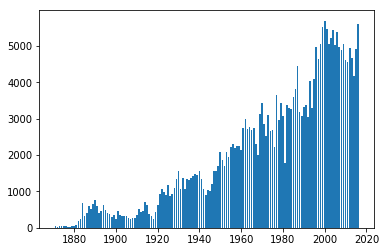

In [200]:
% matplotlib inline
import matplotlib.pyplot as plt
TotalHour=df.groupby("yearID").HR.sum().reset_index()
years=df.yearID.unique()
plt.bar(years,TotalHour.HR)
plt.xlabel
plt.ylabel
plt.show()

BONUS:Using a line graph please graph the average HRs per AB (think about this) per season

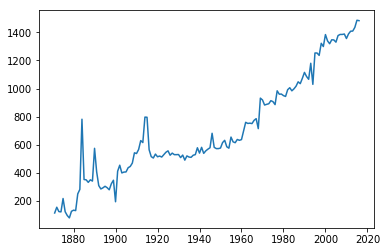

In [201]:
df["Average"]=df["AB"]/df["HR"]
PerSeason=df.yearID.unique()
df1=df.groupby("yearID")["Average"].size().reset_index()
plt.plot(PerSeason,df1["Average"])